In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
import os

['C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/export', 'C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/export\\220512_run_112_calibration_2801_50p_v5_abel', 'C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/export\\220512_run_112_calibration_2801_50p_v5_abel\\.ipynb_checkpoints', 'C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/export\\220512_run_113_calibration_2801_50p_v1_able', 'C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/export\\220512_run_114_calibration_2801_50p_v8_abel', 'C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/export\\220512_run_115_calibration_2801_50p_v7_abel', 'C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/export\\220512_run_116_calibration_2801_50p_v6_abel', 'C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/export\\220512_run_117_calibration_2801_50p_v4_abel', 'C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/export\\220512_run_118_calibration_2801_50p_v3_abel', 'C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/export\\220512_run_119_calibration_2801_50p_v2_abel', 'C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/

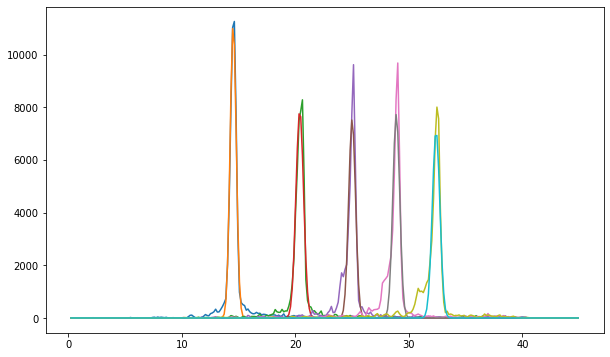

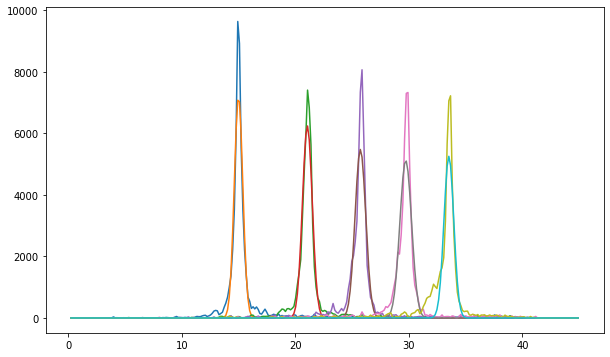

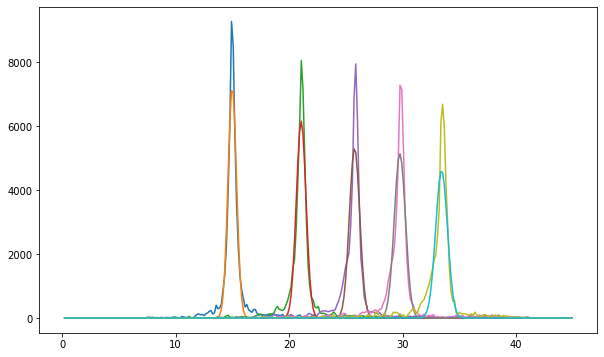

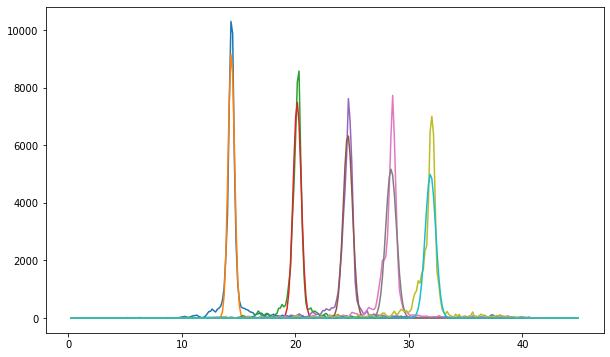

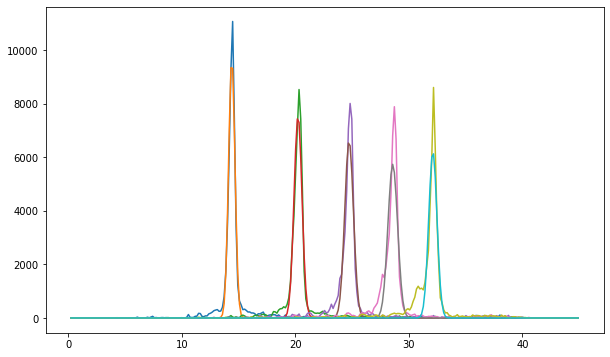

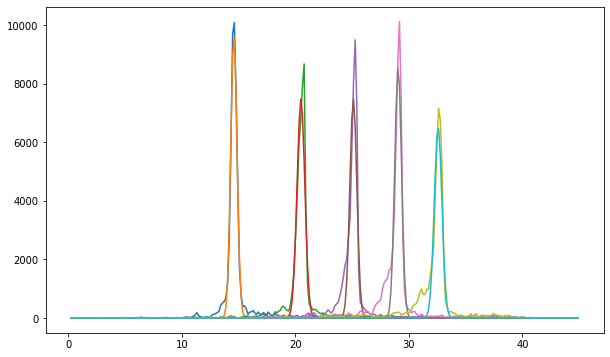

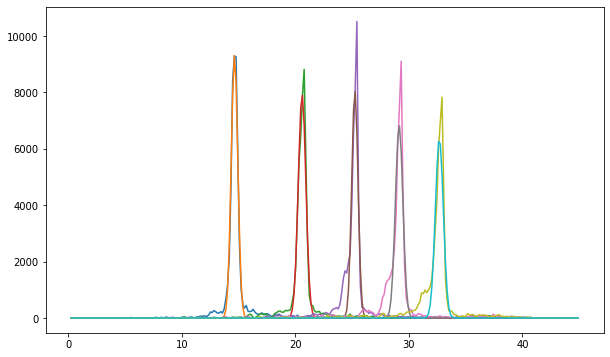

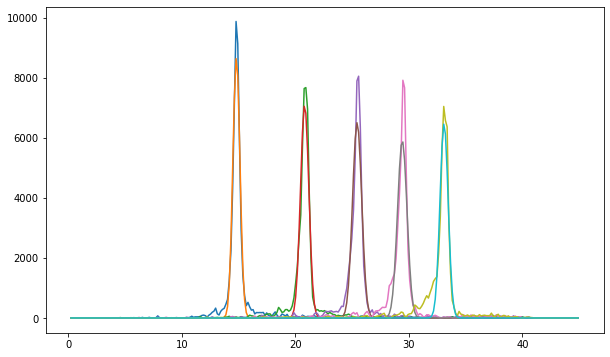

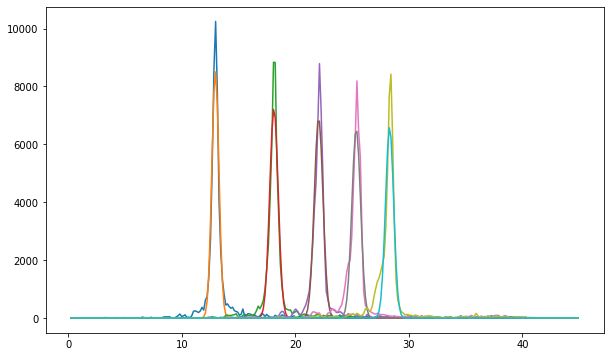

In [156]:
dirs = [n[0] for n in os.walk("C:/Users/Asger/SE-_22/Øvelse 5/data/eksp_5/export")]
radii = []
sigmas = []
plot = True
dirs.pop(2) #remove ipynb checkpoint
for j, directory in enumerate(dirs[1:]):
    path = directory+"/*.cod"
    plt.figure(figsize=(10,6))
    fitted_radii = np.zeros(5)
    fitted_sigmas = np.zeros(5)
    for i,file in enumerate(glob.glob(path)):
        df = pd.read_csv(file)
        x=df.iloc[:,0]
        y=df.iloc[:,1]
    
        def gauss(x,a,b,c):
            return a*np.exp(-(x-b)**2/(2*c**2))
    
        p0=[8000,25,5]
        popt, cov = curve_fit(gauss,x,y,p0,sigma=np.sqrt(y),absolute_sigma=True)
        fitted_radii[i] = popt[1]**2
        fitted_sigmas[i] = np.sqrt(cov[1,1])
        
        if plot:
            plt.plot(x,y)
            plt.plot(x,gauss(x,popt[0],popt[1],popt[2]))
    
    radii.append(fitted_radii)
    sigmas.append(fitted_sigmas)

In [189]:
p0 = 0.0245948
p1 = 1.56912e-6
p2 = -5.88108e-10
p0_sig = 8.295e-5
p1_sig = 1.541e-7
p2_sig = 7.933e-11

radii = np.array(np.sqrt(radii))
sigmas = np.array(sigmas)

dE2 = p0_sig**2*(radii**2)**2 + p1_sig**2*(radii**4)**2 + p2_sig**2*(radii**6)**2 + sigmas**2*((p0*2*radii)**2 + (p1*4*radii**3)**2 + (p2*6*radii**5)**2)
dE = np.sqrt(dE2)

In [190]:
def r_to_e(r):
    return p0*r**2 + p1*r**4 - p2*r**6

def calibration(rad_array):
    energies = []
    for rs in rad_array:
        es = []
        for r in rs: 
            e = r_to_e(np.sqrt(r))
            es.append(e)
        energies.append(es)
    return energies

In [184]:
fit_rs_cal = np.array(calibration(radii))
fit_sigs_cal = np.array(calibration(sigmas))

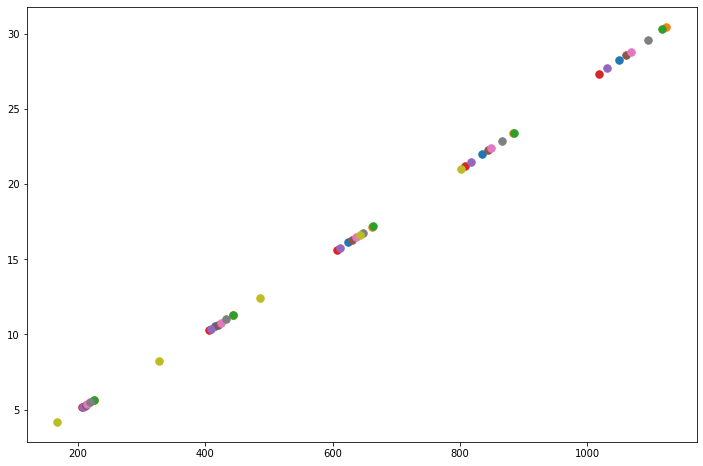

In [185]:
plt.figure(figsize=(12,8))
for i in range(len(radii)):
    plt.plot(radii[i] , fit_rs_cal[i],'.',markersize=15)

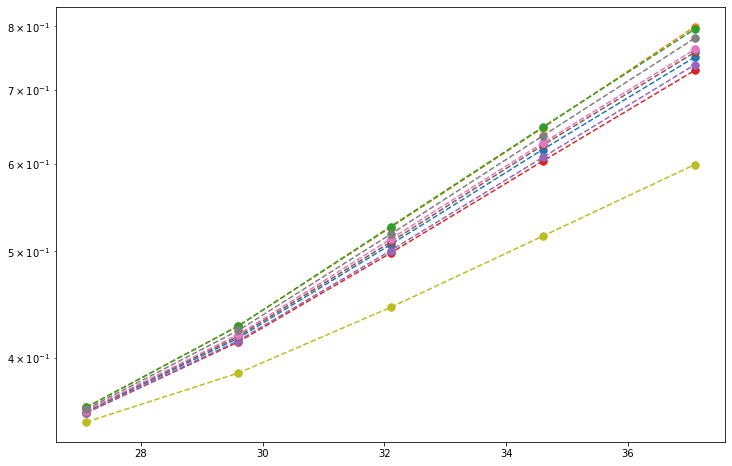

In [196]:
plt.figure(figsize=(12,8))
plt.yscale("log")
for i in range(len(radii)):
    plt.plot(energies, dE[i]/fit_rs_cal[i]*100,'.--',markersize=15)